In [43]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),na_values=["NA"],header=None)
data.head()

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


In [10]:
data.groupby(5).size()

5
0    3818
1    1586
dtype: int64

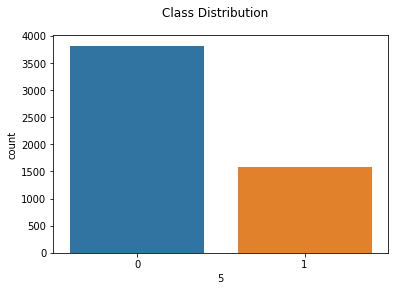

In [17]:
fig,ax=plt.subplots()
fig.suptitle("Class Distribution")
sns.countplot(x=5,data=data)
plt.show()

In [18]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

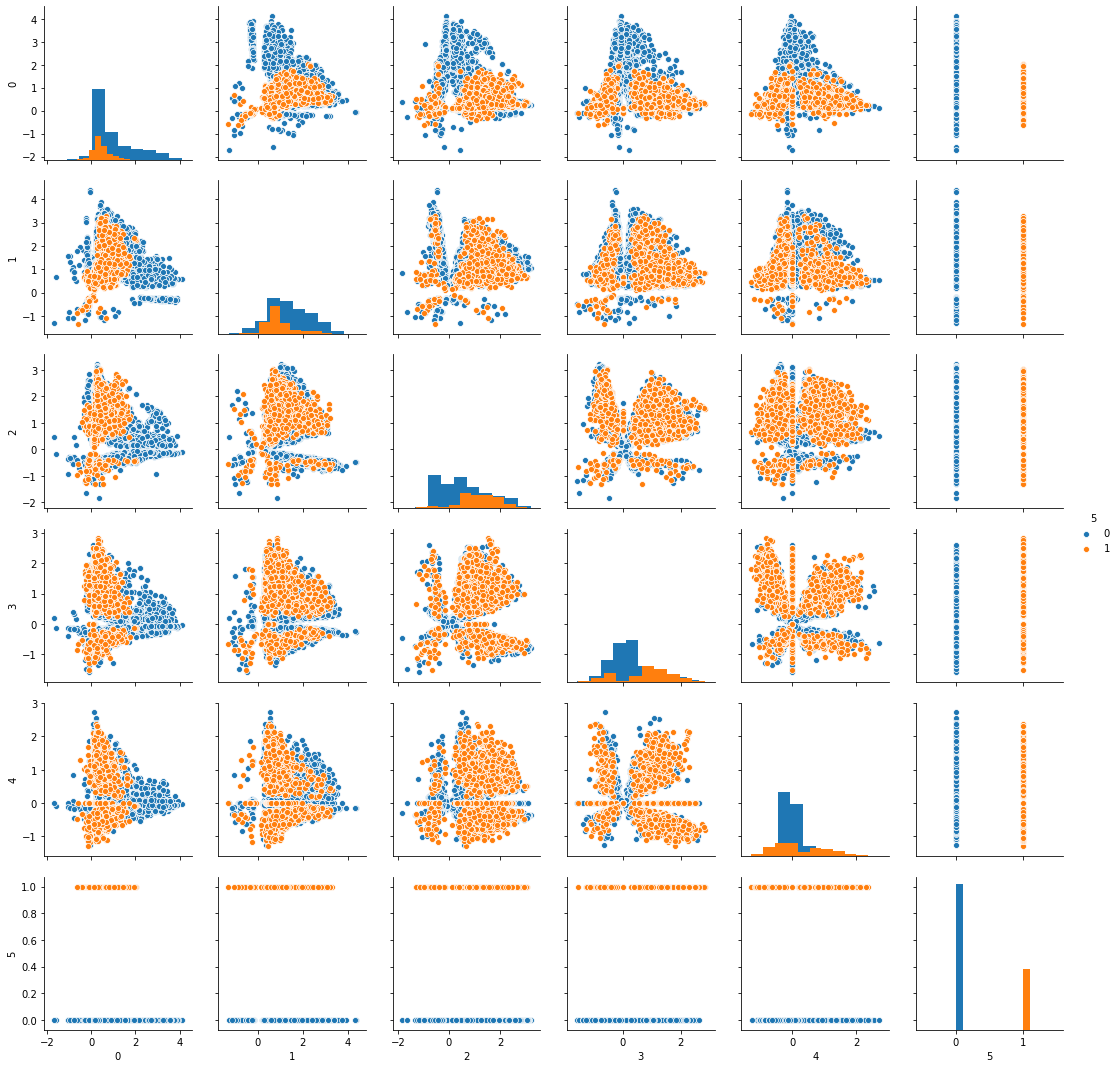

In [21]:
sns.pairplot(data,hue=5,diag_kind="hist")

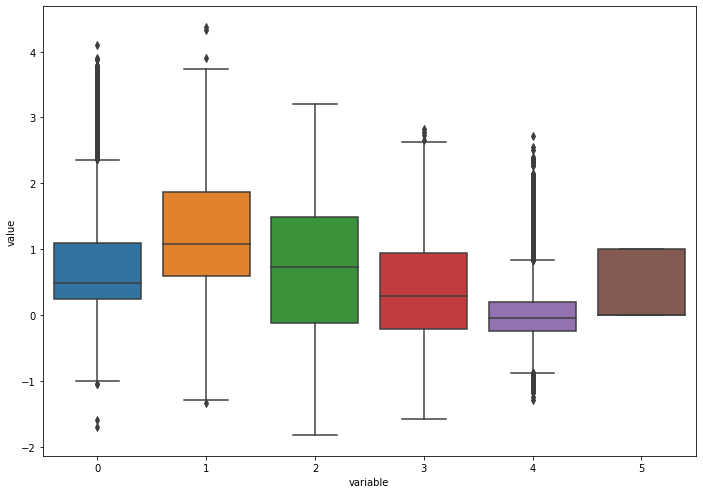

In [22]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.boxplot(x="variable",y="value",data=pd.melt(data._get_numeric_data()),ax=ax)
plt.show()

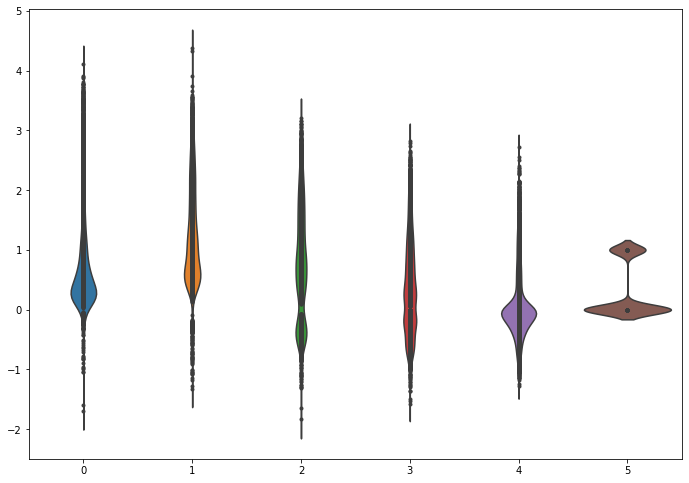

In [23]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.violinplot(data=data._get_numeric_data(),ax=ax,inner="points")
plt.show()

In [29]:
for column_index, column in enumerate(data.columns):
    print(column_index)
    print(column)

0
0
1
1
2
2
3
3
4
4
5
5


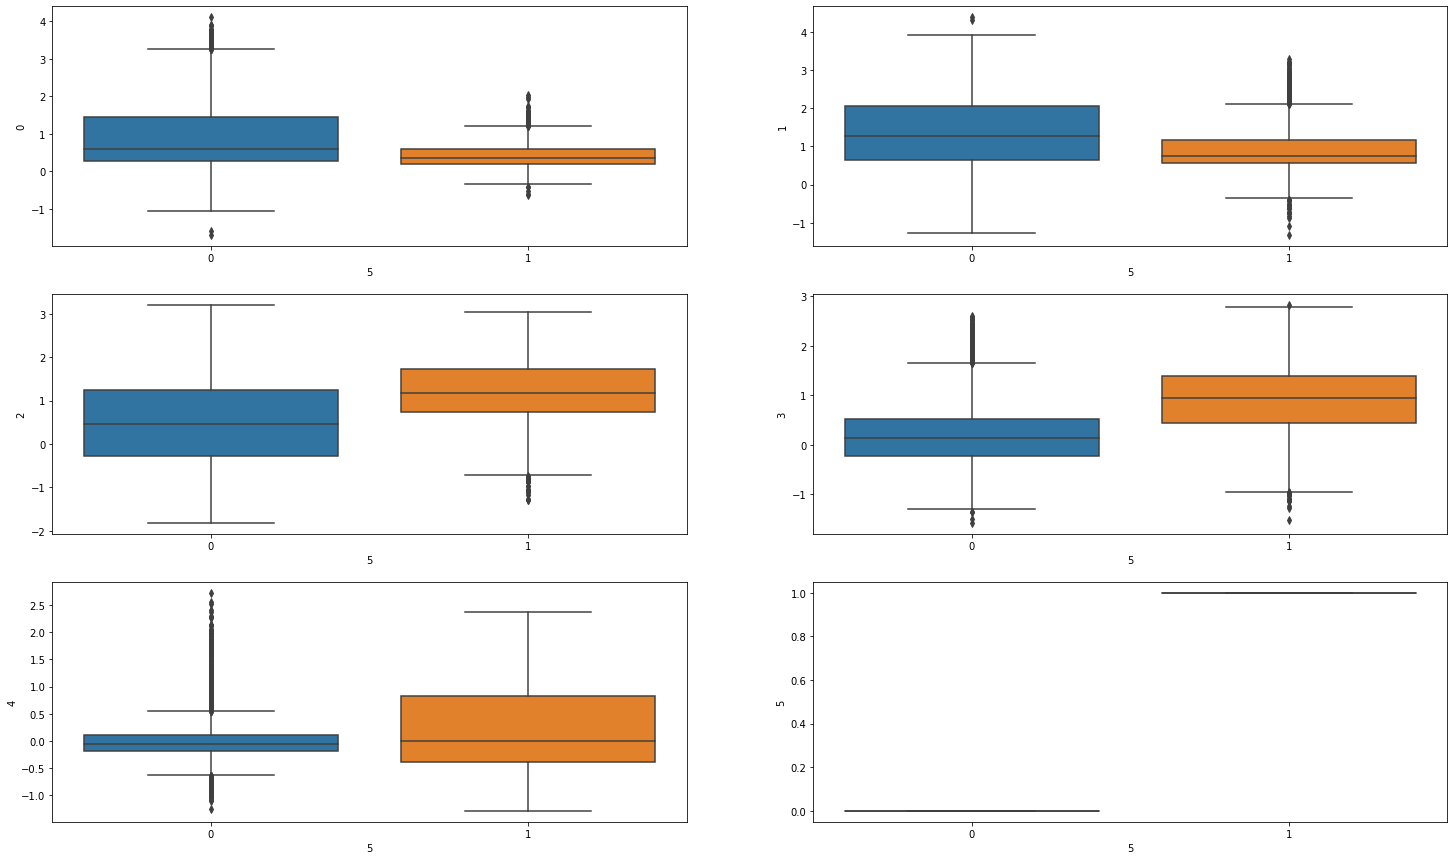

In [34]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data.columns):
    if column=="5":
        continue
    plt.subplot(3, 2, column_index+1 )
    sns.boxplot(x=5, y=column, data=data)

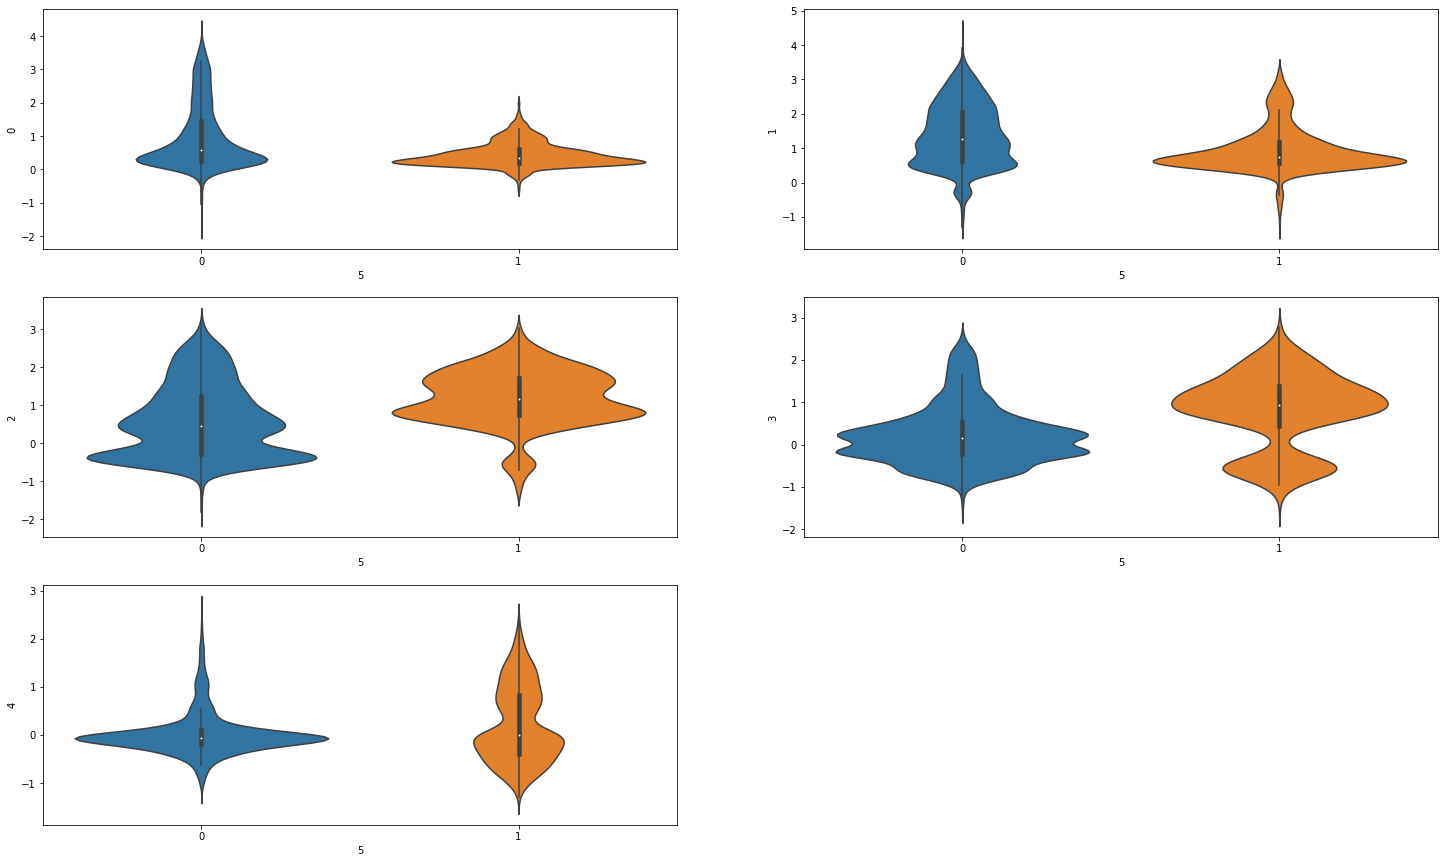

In [35]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data.columns):
    if column==5:
        continue
    plt.subplot(3, 2, column_index + 1)
    sns.violinplot(x=5, y=column, data=data)

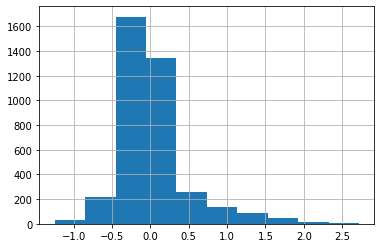

In [37]:
data.loc[data[5]==0,4].hist()

In [38]:
data.head()

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


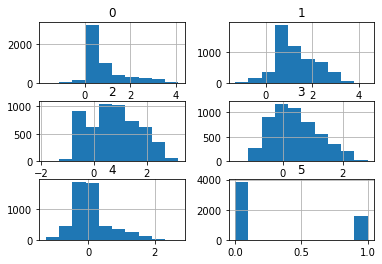

In [40]:
data.hist()
plt.show()

In [47]:
#data=data.values


array([[ 0.137,  0.714,  1.35 ,  0.972, -0.63 ,  1.   ],
       [ 0.15 ,  0.933,  2.363, -0.742, -0.617,  0.   ],
       [ 1.031,  0.584,  1.866,  1.532, -0.671,  1.   ],
       ...,
       [ 1.567,  0.867,  1.3  ,  1.041,  0.559,  0.   ],
       [ 0.268,  1.352,  1.035, -0.332,  0.217,  0.   ],
       [ 1.24 ,  0.875, -0.205, -0.078,  0.067,  0.   ]])

In [48]:
X, y = data[:, :-1], data[:, -1]

In [57]:
! pip3 install imblearn

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/imblearn/
  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 163kB 3.1MB/s ta 0:00:01


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(X, y, model):
# define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1) # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1) 
    return scores


In [70]:
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std
model = DummyClassifier(strategy='uniform')
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean G-mean: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean G-mean: 0.500 (0.021)


In [64]:
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs')) 
    names.append('LR')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    #Bagging 
    models.append(BaggingClassifier(n_estimators=1000)) 
    names.append('BAG')
    # RF 
    models.append(RandomForestClassifier(n_estimators=1000)) 
    names.append('RF')
    # ET 
    models.append(ExtraTreesClassifier(n_estimators=1000)) 
    names.append('ET')
    return models, names

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
  # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.635 (0.012)
>SVM 0.799 (0.009)
>BAG 0.883 (0.005)
>RF 0.884 (0.009)
>ET 0.890 (0.011)


<Figure size 720x720 with 0 Axes>

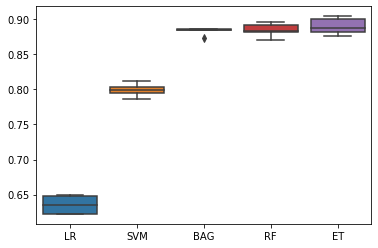

In [77]:
plt.figure(figsize=(10, 10))
fig,ax=plt.subplots()

sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

In [82]:
def get_models():
    models, names = list(), list()
    # RandomOverSampler 
    models.append(RandomOverSampler()) 
    names.append('ROS')
    # SMOTE
    models.append(SMOTE()) 
    names.append('SMOTE')
    # BorderlineSMOTE 
    models.append(BorderlineSMOTE()) 
    names.append('BLSMOTE')
    # SVMSMOTE 
    models.append(SVMSMOTE()) 
    names.append('SVMSMOTE')
    # ADASYN
    models.append(ADASYN()) 
    names.append('ADASYN')
    return models, names

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
  # define the model
    model = ExtraTreesClassifier(n_estimators=1000)
      # define the pipeline steps
    steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)] # define the pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>ROS 0.887 (0.009)
>SMOTE 0.900 (0.009)
>BLSMOTE 0.903 (0.010)
>SVMSMOTE 0.903 (0.012)
>ADASYN 0.906 (0.007)
